In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [11]:
df = pd.read_csv('/kaggle/input/predicting-hiring-decisions-in-recruitment-data/recruitment_data.csv')
df.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


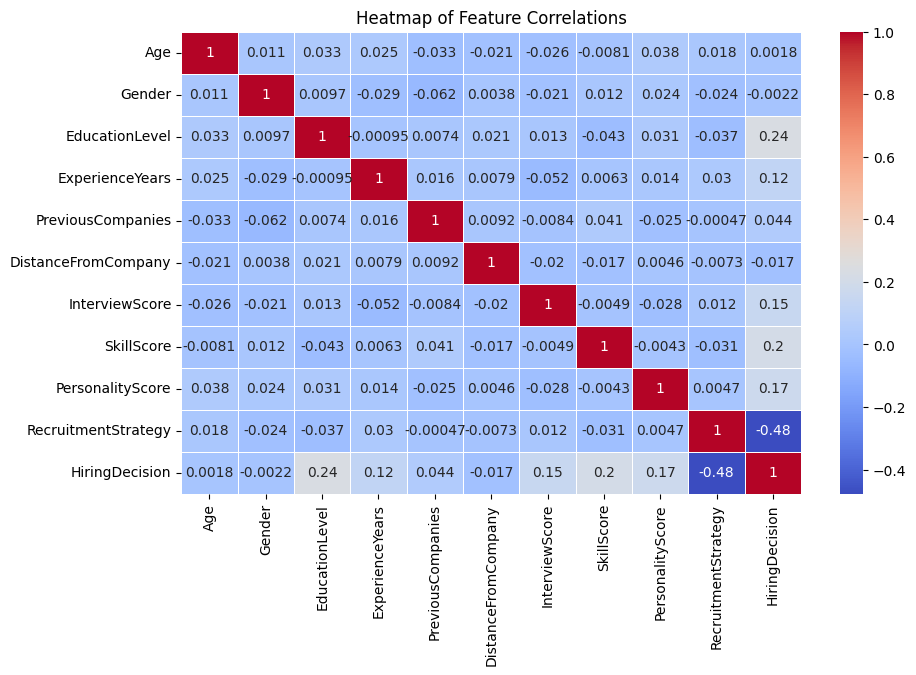

In [12]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

In [13]:
min_val = df['PersonalityScore'].min()
max_val = df['PersonalityScore'].max()

df['PersonalityScore'] = (df['PersonalityScore'] - min_val) / (max_val - min_val)


In [14]:
min_val = df['SkillScore'].min()
max_val = df['SkillScore'].max()

df['SkillScore'] = (df['SkillScore'] - min_val) / (max_val - min_val)

In [16]:
min_val = df['InterviewScore'].min()
max_val = df['InterviewScore'].max()

df['InterviewScore'] = (df['InterviewScore'] - min_val) / (max_val - min_val)

In [17]:
df=df.drop('Age',axis=1)

In [18]:
df

,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,1,2,0,3,26.783828,0.48,0.78,0.91,1,1
1,1,4,12,3,25.862694,0.35,0.68,0.80,2,1
2,0,2,3,2,9.920805,0.20,0.67,0.13,2,0
3,1,2,5,2,6.407751,0.36,0.27,0.70,3,0
4,0,1,6,1,43.105343,0.23,0.52,0.85,2,0
...,...,...,...,...,...,...,...,...,...,...
1495,0,2,3,4,9.183783,0.66,0.03,0.80,3,1
1496,1,2,10,3,14.847731,0.43,0.97,0.07,2,0
1497,1,1,1,2,4.289911,0.31,0.91,0.58,1,1
1498,0,2,4,4,36.299263,0.09,0.37,0.44,2,1


In [19]:
y= df['HiringDecision']
X=df.drop('HiringDecision',axis=1)
y=pd.DataFrame(y)
X=pd.DataFrame(X)

display(y.head())
display(X.head())

,HiringDecision
0,1
1,1
2,0
3,0
4,0


,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy
0,1,2,0,3,26.783828,0.48,0.78,0.91,1
1,1,4,12,3,25.862694,0.35,0.68,0.80,2
2,0,2,3,2,9.920805,0.20,0.67,0.13,2
3,1,2,5,2,6.407751,0.36,0.27,0.70,3
4,0,1,6,1,43.105343,0.23,0.52,0.85,2


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,shuffle = True, random_state=32)

In [21]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

Model Accuracy: 0.88
